**Applied Machine Learning - Homework 2**

**Omkar Korade**

**Abhijeet Suresh Thorat**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [5]:
# Reading aggregateRockData.xlsx file
df = pd.read_excel('aggregateRockData.xlsx', sheet_name='Sheet1',header=None,usecols=[1],nrows=480)

In [6]:
#print number of rows in above dataframe

print(len(df))

480


In [7]:
# Getting shape of above dataframe
print("Number of columns:", df.shape[1])

Number of columns: 1


In [8]:
df.head()

,1
0,1
1,1
2,1
3,1
4,1


In [9]:
# Reading feature_presence540.txt file
df2 = pd.read_csv('feature_presence540.txt', delimiter='\s+', header=None,usecols=range(2,14), nrows=480)

In [10]:
# Getting shape of above dataframe
print("Number of columns:", df2.shape[1])

Number of columns: 12


In [11]:
## Display the first few rows for verification purpose
df2.head()

,2,3,4,5,6,7,8,9,10,11,12,13
0,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [12]:
# Counting number of rows for verification purpose
row_count_df2 = df2.shape[0]
print("Number of rows in df2 = ",row_count_df2)

Number of rows in df2 =  480


In [13]:
# Concatenate df1 and df2 along columns
data = pd.concat([df, df2], axis=1)

In [14]:
# visaulising data
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [15]:
data.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,13
475,3,12,0.0,0.0,0.0,0.0,0.60,0.05,0.0,0.00,0.0,0.0,0.30
476,3,13,0.0,0.0,0.0,0.0,0.40,0.00,0.0,0.05,0.0,0.0,0.35
477,3,14,0.0,0.0,0.0,0.0,0.45,0.05,0.0,0.05,0.0,0.0,0.20
478,3,15,0.0,0.0,0.0,0.0,0.40,0.10,0.0,0.10,0.0,0.0,0.20
479,3,16,0.0,0.0,0.0,0.0,0.55,0.00,0.0,0.05,0.0,0.0,0.15


**Data Preprocessing**


In [16]:
# Check for missing values
missing_values = data.isnull().sum()

In [17]:
print(missing_values)

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [19]:
# Check the shape of final dataset
data.shape

(480, 13)

Note: There are no missing values in the dataset

In [20]:
data.columns = [
    "Category number",
    "Token number",
    "Angular fragments",
    "Rounded fragments",
    "Straight stripes",
    "Curved stripes",
    "Physical layers",
    "Veins",
    "Oily/shimmery texture",
    "Splotchy texture",
    "Single translucent crystal",
    "Multiple cubic crystals",
    "Sandy texture",
]

column_names = data.columns

In [21]:
data

,Category number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,3,12,0.00,0.00,0.0,0.0,0.60,0.05,0.0,0.00,0.0,0.00,0.30
476,3,13,0.00,0.00,0.0,0.0,0.40,0.00,0.0,0.05,0.0,0.00,0.35
477,3,14,0.00,0.00,0.0,0.0,0.45,0.05,0.0,0.05,0.0,0.00,0.20
478,3,15,0.00,0.00,0.0,0.0,0.40,0.10,0.0,0.10,0.0,0.00,0.20


In [22]:
# save the dataframe to excel

data.to_excel('output.xlsx', index=False)

In [23]:
data.describe()

,Category number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2.000000,8.500000,0.084479,0.080208,0.067729,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854
std,0.817348,4.614582,0.193996,0.197648,0.194792,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,8.500000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000
75%,3.000000,12.250000,0.050000,0.050000,0.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000
max,3.000000,16.000000,1.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000


In [24]:
# Q.1

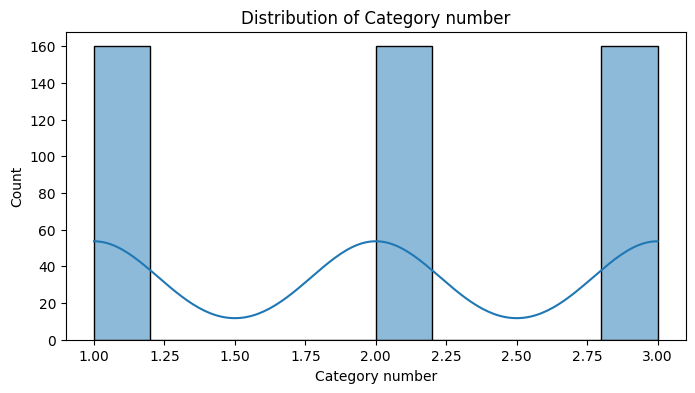

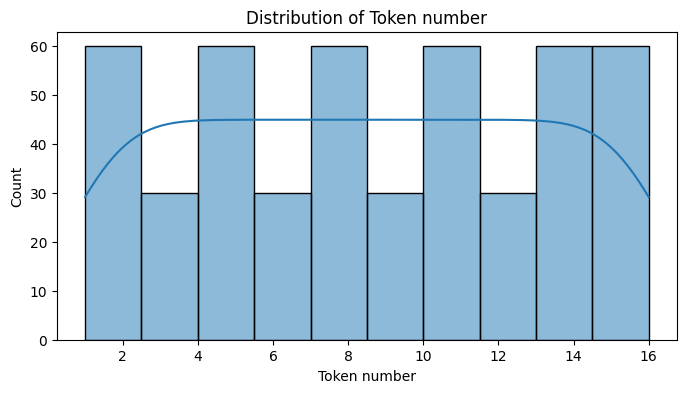

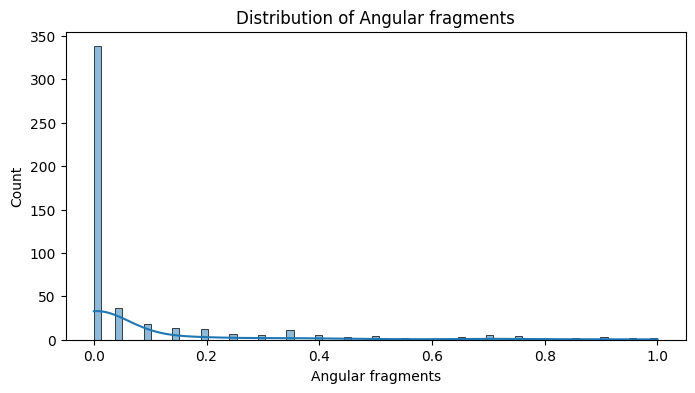

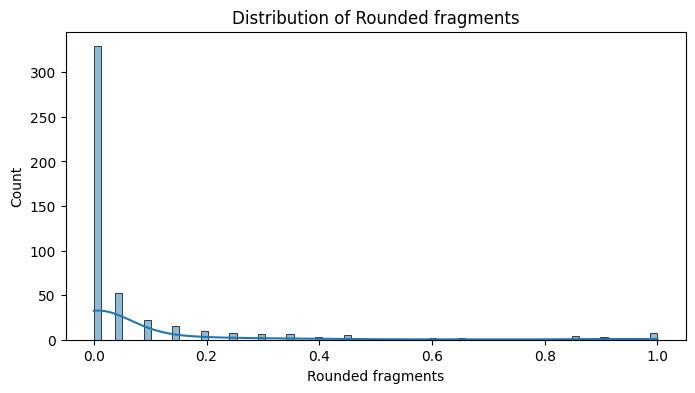

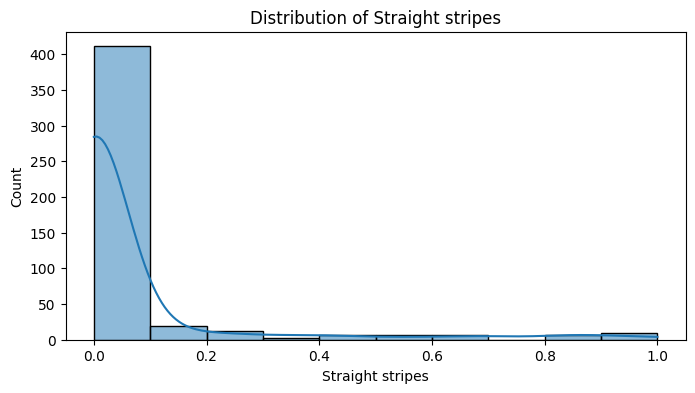

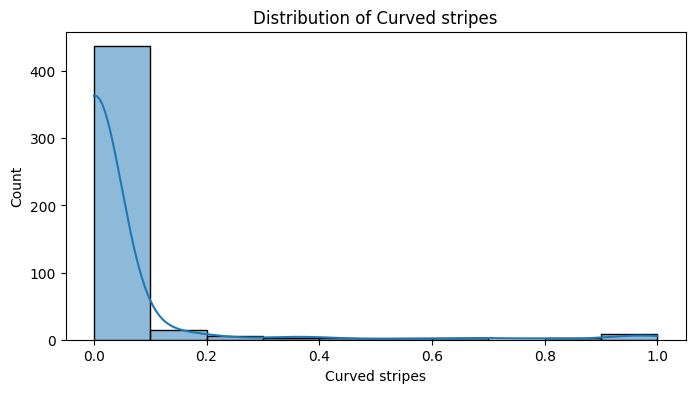

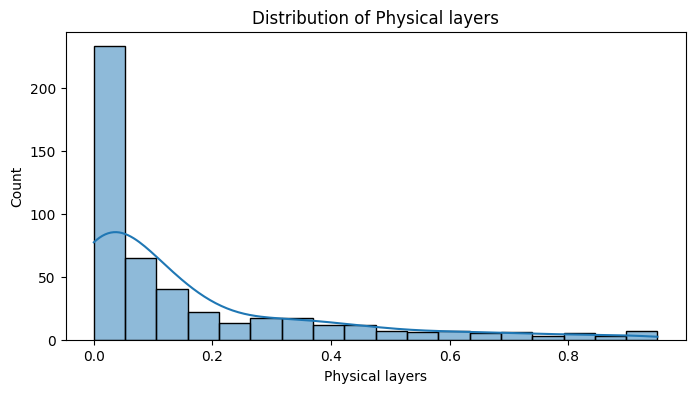

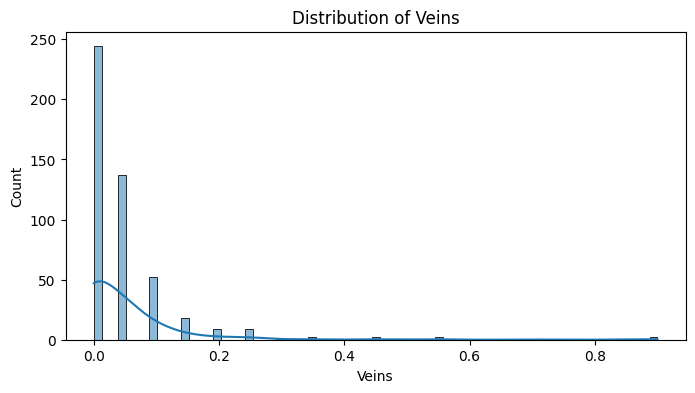

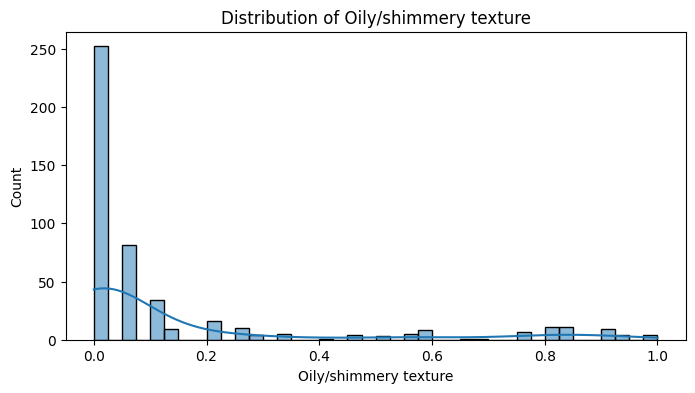

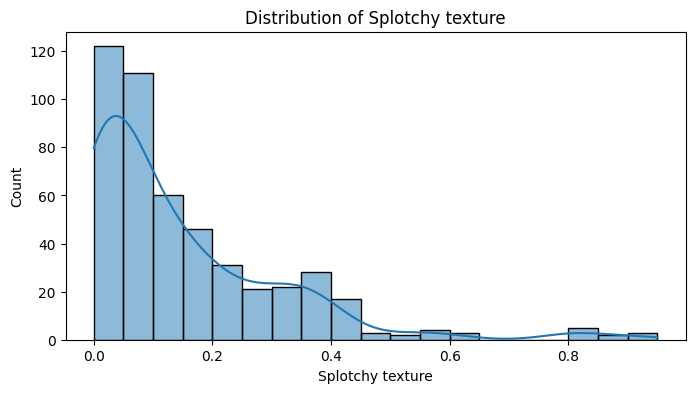

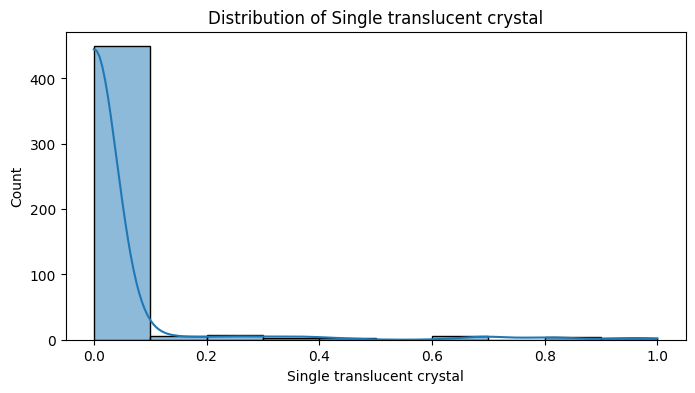

In [25]:
# Plot histograms for each feature to visually inspect skewness
for column in data.columns[:-2]:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Question 1
#  Are there any attributes that might require special treatment? If so, what special treatment might they require?

Outliers:

Features: Since the features are continuous numerical values, they could contain outliers that might skew the analysis.
Special Treatment:
Outlier detection methods (like IQR or Z-score) could be employed to identify and potentially remove or adjust outlier values.
Visual methods like box plots could help in identifying outliers.

Data Distribution:

Features: Some features may not follow a normal distribution, which could affect statistical analyses and machine learning algorithms.
Special Treatment:
Transformations (e.g., log transformation, square root transformation) might be necessary to normalize skewed distributions.
Standardization or normalization might be applied to bring features to a similar scale, especially for distance-based algorithms like KNN or SVM.

Categorical Variables:

Category: The Category variable is categorical (representing rock types).
Special Treatment: Encoding techniques (like one-hot encoding or label encoding) might be required for machine learning applications, depending on the algorithm used.

In [30]:
corr_matrix = data.corr(method="pearson")['Category number']
print(corr_matrix)

Category number               1.000000e+00
Token number                 -9.070297e-16
Angular fragments            -1.224469e-01
Rounded fragments             1.744612e-02
Straight stripes              7.749481e-02
Curved stripes               -1.745444e-02
Physical layers               2.666991e-01
Veins                         1.405526e-01
Oily/shimmery texture         8.171521e-03
Splotchy texture             -2.292728e-01
Single translucent crystal    2.589103e-01
Multiple cubic crystals       1.138719e-01
Sandy texture                 1.398446e-01
Name: Category number, dtype: float64


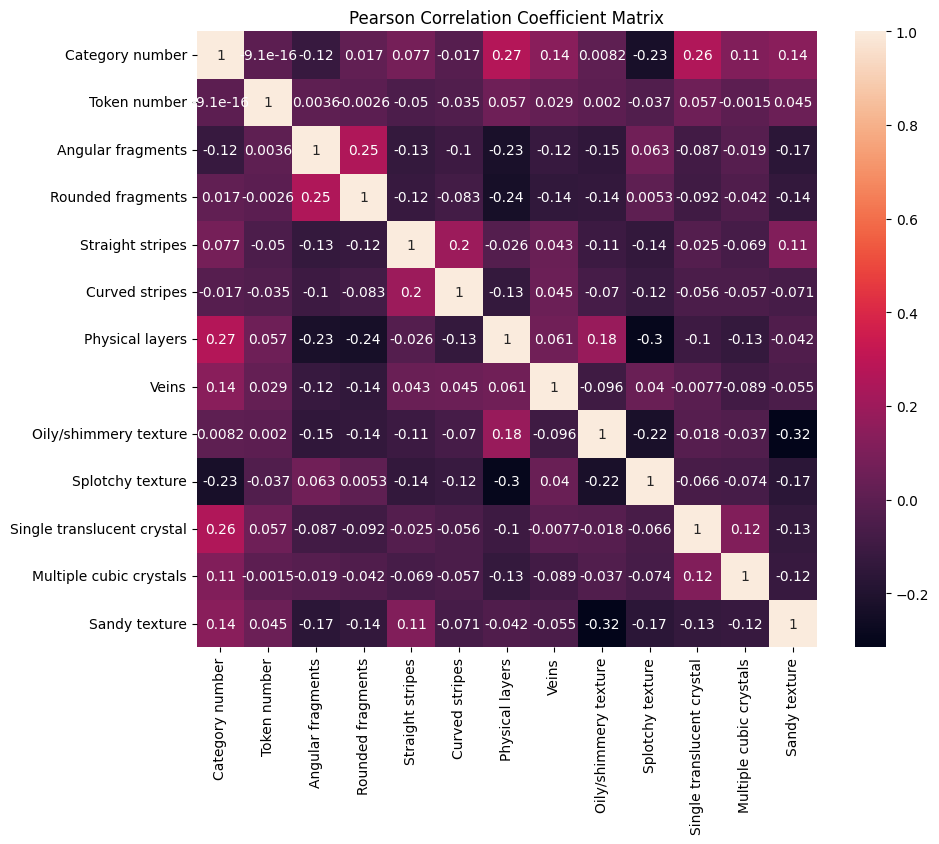

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Pearson Correlation Coefficient Matrix')
plt.show()

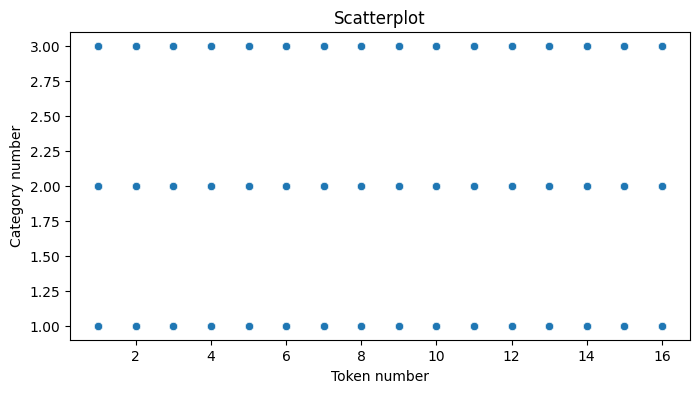

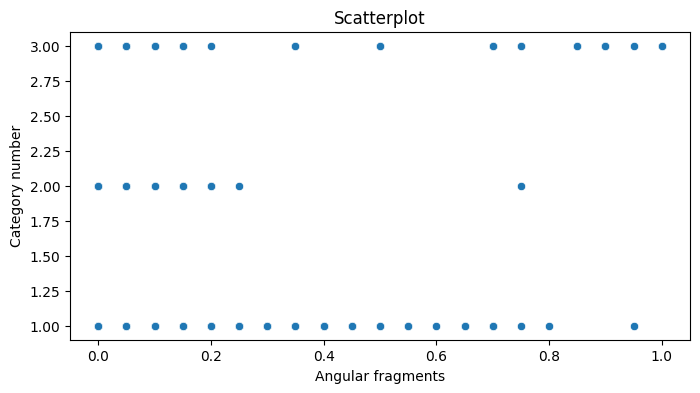

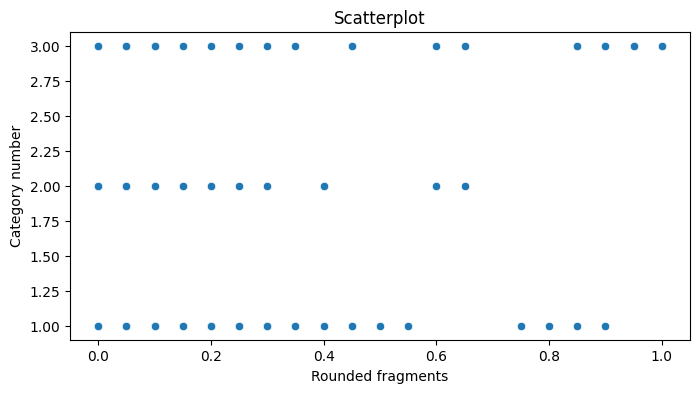

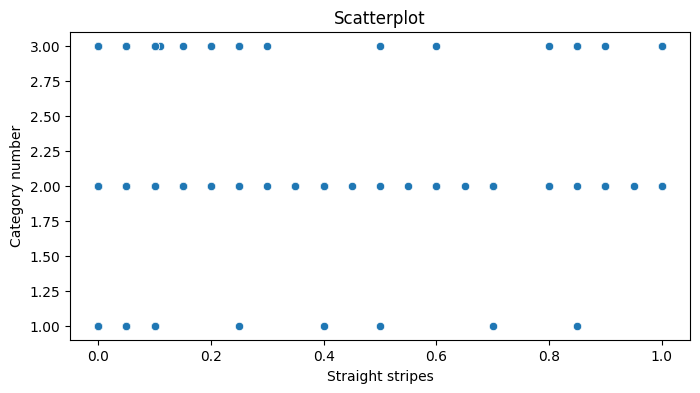

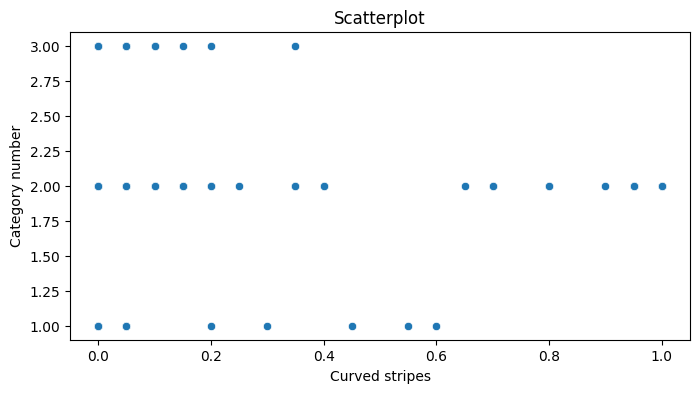

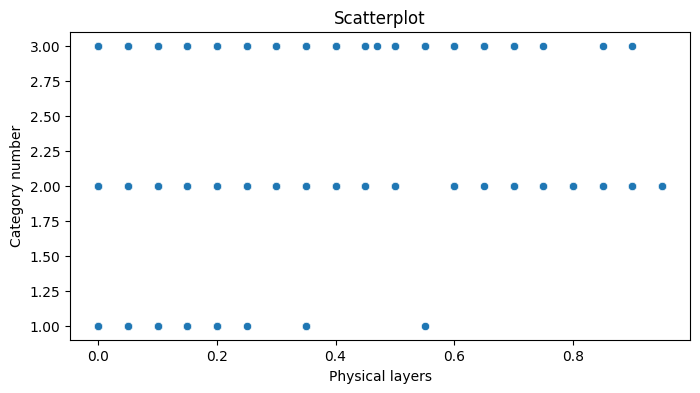

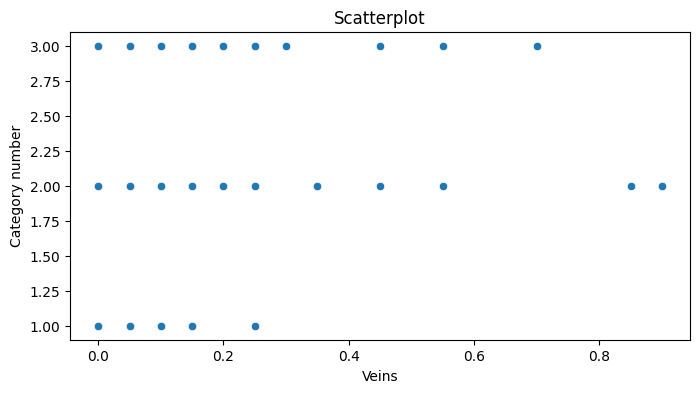

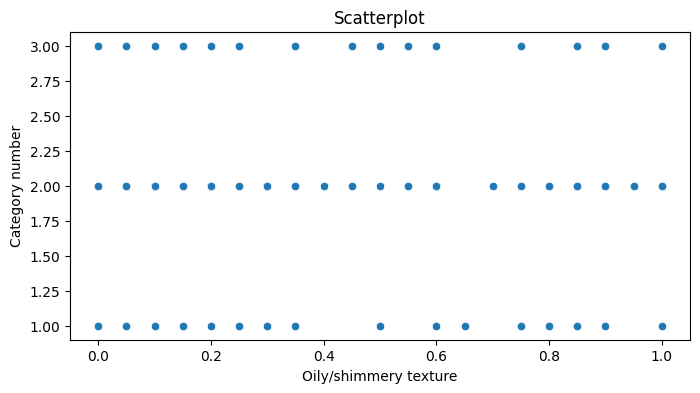

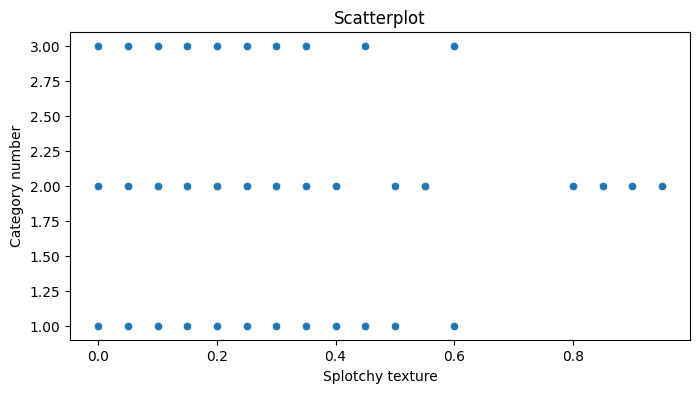

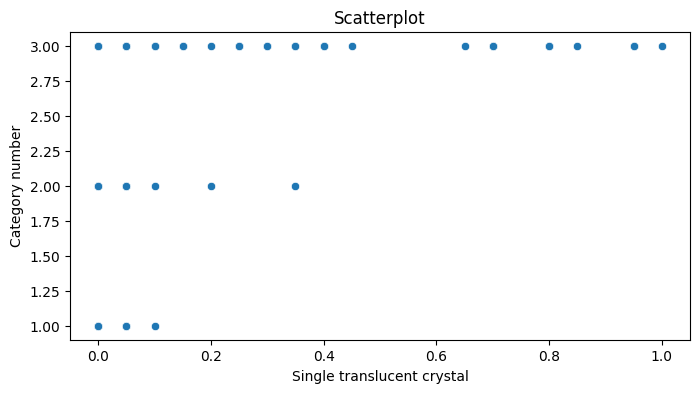

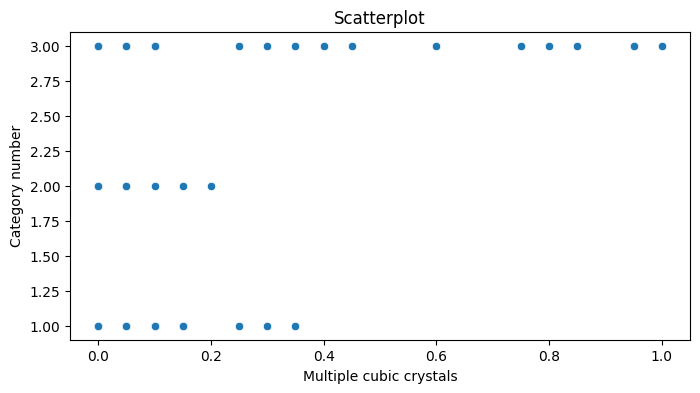

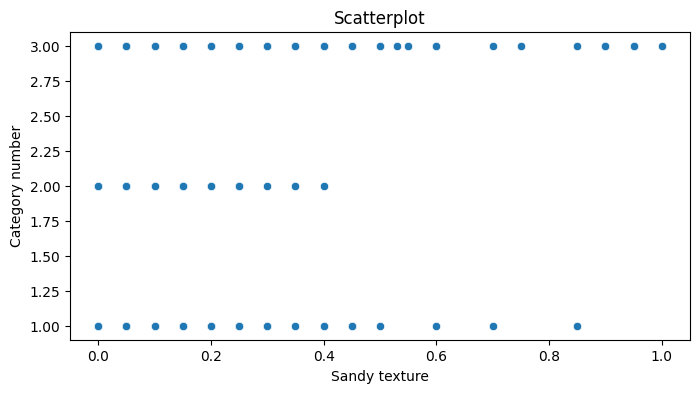

In [31]:
# Plot histograms for each feature to visually inspect skewness
for column in data.columns[1:]:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=data[column], y=data['Category number'])
    plt.title('Scatterplot')
    plt.xlabel(f'{column}')
    plt.ylabel('Category number')
    plt.show()

In [32]:
training_data = data[(data['Token number'] >= 1) & (data['Token number'] <= 10)]
validation_data = data[(data['Token number'] >= 11) & (data['Token number'] <= 13)]
testing_data = data[(data['Token number'] >= 14) & (data['Token number'] <= 16)]

In [33]:
training_data.head()

,Category number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [34]:
X_train = training_data[['Angular fragments','Rounded fragments', 'Straight stripes', 'Physical layers', 'Veins', 'Splotchy texture', 'Single translucent crystal', 'Multiple cubic crystals', 'Sandy texture']]
y_train = training_data['Category number']

X_val = validation_data[['Angular fragments','Rounded fragments', 'Straight stripes', 'Physical layers', 'Veins', 'Splotchy texture', 'Single translucent crystal', 'Multiple cubic crystals', 'Sandy texture']]
y_val = validation_data['Category number']

X_test = testing_data[['Angular fragments','Rounded fragments', 'Straight stripes', 'Physical layers', 'Veins', 'Splotchy texture', 'Single translucent crystal', 'Multiple cubic crystals', 'Sandy texture']]
y_test = testing_data['Category number']

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)

In [37]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42), param_grid, cv=5)
grid_search.fit(X_train_poly, y_train)

print("best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

best parameters: {'C': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [38]:
model = LogisticRegression(multi_class='multinomial', C=10, solver='lbfgs', max_iter=200, random_state=42)

model.fit(X_train_poly, y_train)

y_val_pred = model.predict(X_val_poly)
validation_report = classification_report(y_val, y_val_pred, target_names=['1', '2', '3'])

y_test_pred = model.predict(X_test_poly)
test_report = classification_report(y_test, y_test_pred, target_names=['1', '2', '3'])

print(validation_report, test_report)

              precision    recall  f1-score   support

           1       0.76      0.87      0.81        30
           2       0.65      0.67      0.66        30
           3       0.80      0.67      0.73        30

    accuracy                           0.73        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.74      0.73      0.73        90
               precision    recall  f1-score   support

           1       0.74      0.67      0.70        30
           2       0.69      0.67      0.68        30
           3       0.74      0.83      0.78        30

    accuracy                           0.72        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.72      0.72      0.72        90



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Axes: >

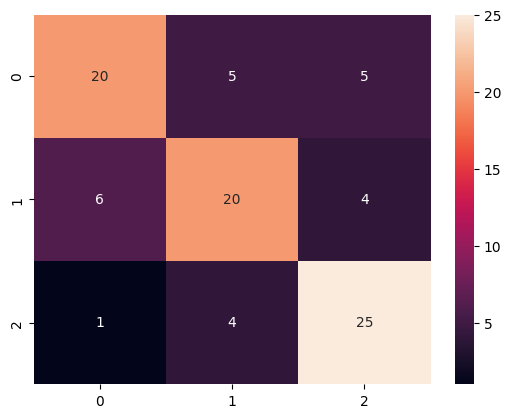

In [39]:
cm = confusion_matrix(y_test, y_test_pred)
cm_matrix = pd.DataFrame(data = cm)
sns.heatmap(cm_matrix, annot=True)

In [55]:
from sklearn.svm import SVC

param_grid = {
    'kernel': ["linear", "rbf", "poly"],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
    }
grid_search = GridSearchCV(SVC(degree=3, max_iter=500, random_state=42), param_grid, cv=5)
grid_search.fit(X_train_poly, y_train)

print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-

Best parameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}


In [54]:
model = SVC(C=10, kernel='rbf', degree=3, gamma='scale', class_weight='balanced')

model.fit(X_train_poly, y_train)

y_val_pred = model.predict(X_val_poly)
validation_report = classification_report(y_val, y_val_pred, target_names=['1', '2', '3'])

y_test_pred = model.predict(X_test_poly)
test_report = classification_report(y_test, y_test_pred, target_names=['1', '2', '3'])

print(validation_report, test_report)

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        30
           2       0.65      0.73      0.69        30
           3       0.81      0.70      0.75        30

    accuracy                           0.74        90
   macro avg       0.75      0.74      0.75        90
weighted avg       0.75      0.74      0.75        90
               precision    recall  f1-score   support

           1       0.72      0.70      0.71        30
           2       0.65      0.73      0.69        30
           3       0.70      0.63      0.67        30

    accuracy                           0.69        90
   macro avg       0.69      0.69      0.69        90
weighted avg       0.69      0.69      0.69        90



<Axes: >

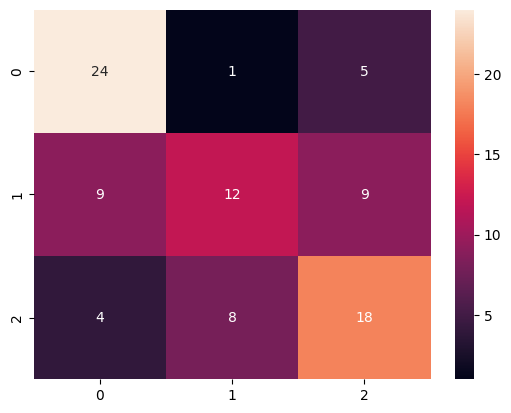

In [50]:
cm = confusion_matrix(y_test, y_test_pred)
cm_matrix = pd.DataFrame(data = cm)
sns.heatmap(cm_matrix, annot=True)

In [42]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train_poly, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')

model.fit(X_train_poly, y_train)

y_val_pred = model.predict(X_val_poly)
validation_report = classification_report(y_val, y_val_pred, target_names=['1', '2', '3'])

y_test_pred = model.predict(X_test_poly)
test_report = classification_report(y_test, y_test_pred, target_names=['1', '2', '3'])

print(validation_report, test_report)

              precision    recall  f1-score   support

           1       0.72      0.87      0.79        30
           2       0.69      0.60      0.64        30
           3       0.71      0.67      0.69        30

    accuracy                           0.71        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.71      0.71      0.71        90
               precision    recall  f1-score   support

           1       0.76      0.73      0.75        30
           2       0.71      0.73      0.72        30
           3       0.73      0.73      0.73        30

    accuracy                           0.73        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.73      0.73      0.73        90



In [56]:
from sklearn.ensemble import VotingClassifier

In [57]:
logistic_model = LogisticRegression(multi_class='multinomial', C=10, solver='lbfgs', max_iter=200, random_state=42)
svm_model = SVC(C=1, kernel='rbf', degree=3, gamma='scale', class_weight='balanced', probability = True)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')

ensemble_model = VotingClassifier(estimators=[
    ('logisitc_model', logistic_model),
    ('svm_model', svm_model),
    ('rf_model', rf_model)
], voting='soft')

ensemble_model.fit(X_train_poly, y_train)

y_val_pred = ensemble_model.predict(X_val_poly)
validation_report = classification_report(y_val, y_val_pred, target_names=['1', '2', '3'])

y_test_pred = ensemble_model.predict(X_test_poly)
test_report = classification_report(y_test, y_test_pred, target_names=['1', '2', '3'])

print("Validation Report:\n", validation_report)
print("Test Report:\n", test_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Report:
               precision    recall  f1-score   support

           1       0.76      0.87      0.81        30
           2       0.67      0.73      0.70        30
           3       0.87      0.67      0.75        30

    accuracy                           0.76        90
   macro avg       0.77      0.76      0.76        90
weighted avg       0.77      0.76      0.76        90

Test Report:
               precision    recall  f1-score   support

           1       0.75      0.70      0.72        30
           2       0.68      0.77      0.72        30
           3       0.79      0.73      0.76        30

    accuracy                           0.73        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.74      0.73      0.73        90



In [68]:
human_data = pd.read_csv('trialData.csv')
human_data.head()

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
0,A1HUMXQ7SEXD8E,1,1,331,Sedimentary,Bituminous Coal,11,NonparentTraining,Metamorphic,NaN,0,NaN
1,A1HUMXQ7SEXD8E,1,2,398,Sedimentary,Dolomite,14,NonparentTraining,Igneous,NaN,0,NaN
2,A1HUMXQ7SEXD8E,1,3,19,Igneous,Basalt,3,NonparentTraining,Sedimentary,NaN,0,NaN
3,A1HUMXQ7SEXD8E,1,4,338,Sedimentary,Breccia,2,NonparentTraining,Metamorphic,NaN,0,NaN
4,A1HUMXQ7SEXD8E,1,5,60,Igneous,Gabbro,12,NonparentTraining,Sedimentary,NaN,0,NaN


In [69]:
human_data.tail()

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
88542,A2FXYZE13N65FJ,4,1076,366,Sedimentary,Chert,14,StandardTransfer,Sedimentary,No,1,1.0
88543,A2FXYZE13N65FJ,4,1077,412,Sedimentary,Micrite,12,StandardTransfer,Sedimentary,No,1,1.0
88544,A2FXYZE13N65FJ,4,1078,476,Sedimentary,Shale,12,NonparentTraining,Metamorphic,Yes,0,1.0
88545,A2FXYZE13N65FJ,4,1079,168,Metamorphic,Amphibolite,8,NonparentTraining,Sedimentary,No,0,0.0
88546,A2FXYZE13N65FJ,4,1080,517,Igneous,Pumice,17,HSNTransfer,Igneous,No,1,1.0


In [70]:
human_data['rocknumber'].max()

720

In [65]:
human_data['rocknumber'].max()

476

In [71]:
filtered_data = human_data[(human_data['rocknumber'] >= 1) & (human_data['rocknumber'] <= 480)]

In [72]:
filtered_data['rocknumber'].max()

480

In [75]:
filtered_data.describe()

,block,trial,rocknumber,token,cat_correct,rec_correct
count,83627.000000,83627.000000,83627.000000,83627.000000,83627.000000,39354.000000
mean,2.941418,524.492389,240.456467,8.446614,0.578043,0.617371
std,1.161498,311.309248,138.662221,4.532375,0.493875,0.486035
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,255.000000,121.000000,5.000000,0.000000,0.000000
50%,3.000000,510.000000,241.000000,9.000000,1.000000,1.000000
75%,4.000000,793.000000,362.000000,12.000000,1.000000,1.000000
max,4.000000,1088.000000,480.000000,16.000000,1.000000,1.000000


In [99]:
human_data.head()

,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
0,1,1,331,Sedimentary,Bituminous Coal,11,NonparentTraining,Metamorphic,NaN,0,NaN
1,1,2,398,Sedimentary,Dolomite,14,NonparentTraining,Igneous,NaN,0,NaN
2,1,3,19,Igneous,Basalt,3,NonparentTraining,Sedimentary,NaN,0,NaN
3,1,4,338,Sedimentary,Breccia,2,NonparentTraining,Metamorphic,NaN,0,NaN
4,1,5,60,Igneous,Gabbro,12,NonparentTraining,Sedimentary,NaN,0,NaN


In [78]:
filtered_data['block'].nunique()

4

In [84]:
training_data_human = filtered_data[(filtered_data['block'] <=3)]

In [86]:
training_data_human['block'].max()

3

In [101]:
test_data_human = filtered_data[(filtered_data['block'] == 4)]

In [102]:
test_data_human['block'].nunique()

1

In [104]:
human_training_accuracy = training_data_human['cat_correct'].mean() * 100

human_test_accuracy = test_data_human['cat_correct'].mean() * 100

human_training_accuracy, human_test_accuracy

(55.993494906602216, 59.841439243787164)

**How does the human accuracy compare to the accuracy of your best model?**

The model significantly outperforms human accuracy on both training and test data, with a substantial margin (approximately 16-20% higher accuracy). This suggests that the model is better at identifying patterns and correctly classifying the data than human respondents.


In [105]:
rock_accuracy_stats = filtered_data[filtered_data['rocknumber'].between(1,480)].groupby('rocknumber')['cat_correct'].agg(['mean', 'std'])
rock_accuracy_stats

,mean,std
rocknumber,,
1,0.746951,0.435423
2,0.719512,0.452002
3,0.451220,0.500677
4,0.500000,0.503077
5,0.512195,0.502927
...,...,...
476,0.576220,0.494911
477,0.524390,0.502478
478,0.426829,0.497661


In [110]:
X = data[['Angular fragments','Rounded fragments', 'Straight stripes', 'Physical layers', 'Veins', 'Splotchy texture', 'Single translucent crystal', 'Multiple cubic crystals', 'Sandy texture']]

In [112]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

In [114]:
model_probabilities = ensemble_model.predict_proba(X_poly)
model_probabilities


array([[0.78591276, 0.15803551, 0.05605173],
       [0.65306529, 0.03172211, 0.3152126 ],
       [0.83355123, 0.07382617, 0.0926226 ],
       ...,
       [0.12131738, 0.336069  , 0.54261362],
       [0.06941914, 0.34817544, 0.58240542],
       [0.08131624, 0.49965934, 0.41902441]])

In [115]:
len(model_probabilities)

480

In [119]:
max_probabilities = model_probabilities.max(axis=1)

rock_accuracy_stats['model_prob'] = max_probabilities

rock_accuracy_stats

,mean,std,model_max_prob,Category_Num,model_prob
rocknumber,,,,,
1,0.746951,0.435423,0.785913,3,0.785913
2,0.719512,0.452002,0.653065,1,0.653065
3,0.451220,0.500677,0.833551,3,0.833551
4,0.500000,0.503077,0.583850,1,0.583850
5,0.512195,0.502927,0.538635,2,0.538635
...,...,...,...,...,...
476,0.576220,0.494911,0.788684,1,0.788684
477,0.524390,0.502478,0.653590,3,0.653590
478,0.426829,0.497661,0.542614,1,0.542614


In [121]:
rock_accuracy_stats.drop(['model_max_prob'], axis=1, inplace = True)

In [118]:
category_mapping = {'Igneous': 1, 'Metamorphic': 2, 'Sedimentary': 3}
rock_accuracy_stats['Category_Num'] = human_data['category'].map(category_mapping)


,mean,std,model_max_prob,Category_Num
rocknumber,,,,
1,0.746951,0.435423,0.785913,3
2,0.719512,0.452002,0.653065,1
3,0.451220,0.500677,0.833551,3
4,0.500000,0.503077,0.583850,1
5,0.512195,0.502927,0.538635,2
...,...,...,...,...
476,0.576220,0.494911,0.788684,1
477,0.524390,0.502478,0.653590,3
478,0.426829,0.497661,0.542614,1


In [122]:
rock_accuracy_stats

,mean,std,Category_Num,model_prob
rocknumber,,,,
1,0.746951,0.435423,3,0.785913
2,0.719512,0.452002,1,0.653065
3,0.451220,0.500677,3,0.833551
4,0.500000,0.503077,1,0.583850
5,0.512195,0.502927,2,0.538635
...,...,...,...,...
476,0.576220,0.494911,1,0.788684
477,0.524390,0.502478,3,0.653590
478,0.426829,0.497661,1,0.542614


In [123]:
rock_accuracy_stats.to_csv('DataQ6.csv', index=False)

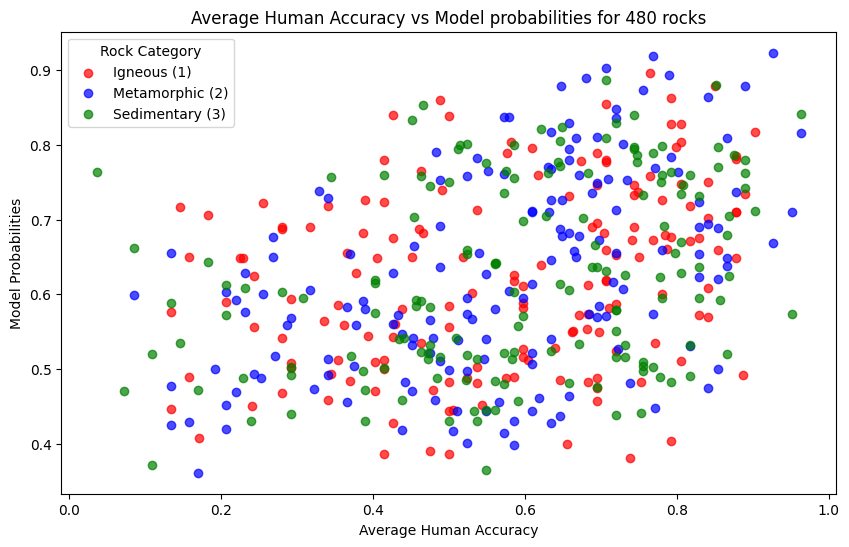

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for category, color in zip([1,2,3], ['red', 'blue', 'green']):
  category_data = rock_accuracy_stats[rock_accuracy_stats['Category_Num'] == category]
  plt.scatter(category_data['mean'], category_data['model_prob'], color=color, label=f"Category {category}", alpha=0.7)

plt.xlabel("Average Human Accuracy")
plt.ylabel("Model Probabilities")
plt.title("Average Human Accuracy vs Model probabilities for 480 rocks")
plt.legend(title='Rock Category', labels=["Igneous (1)", "Metamorphic (2)", "Sedimentary (3)"])
plt.show()

In [125]:
from scipy.stats import pearsonr

correlation_results = {}

for category in [1, 2, 3]:
    category_data = rock_accuracy_stats[rock_accuracy_stats['Category_Num'] == category]
    corr_coef, p_value = pearsonr(category_data['mean'], category_data['model_prob'])
    correlation_results[f'Category {category}'] = {'Correlation Coefficient': corr_coef, 'p-value': p_value}

corr_coef_all, p_value_all = pearsonr(rock_accuracy_stats['mean'], rock_accuracy_stats['model_prob'])
correlation_results['All Rocks'] = {'Correlation Coefficient': corr_coef_all, 'p-value': p_value_all}

correlation_results

{'Category 1': {'Correlation Coefficient': 0.3038748058974042,
  'p-value': 8.900056374065088e-05},
 'Category 2': {'Correlation Coefficient': 0.4705471612732978,
  'p-value': 3.00455081911902e-10},
 'Category 3': {'Correlation Coefficient': 0.332277397210931,
  'p-value': 1.9960890334045803e-05},
 'All Rocks': {'Correlation Coefficient': 0.37047613144622416,
  'p-value': 4.6123759813282256e-17}}

1. Category 1 (Igneous):

  Correlation Coefficient: 0.30

  p-value:
  8.90
  ×
  1
  0
  −
  5
  8.90×10
  −5
  
  Significant: Yes, as the p-value is well below 0.05.


2. Category 2 (Metamorphic):

    Correlation Coefficient: 0.47

    p-value:
    3.00
    ×
    1
    0
    −
    10
    3.00×10
    −10
    
  Significant: Yes, this is a strong and significant correlation.


3. Category 3 (Sedimentary):

  Correlation Coefficient: 0.33

  p-value:
  2.00
  ×
  1
  0
  −
  5
  2.00×10
  −5
  
  Significant: Yes, also significant with a moderate correlation.

Each category shows a statistically significant correlation between human accuracy and model confidence, with the strongest correlation observed in Metamorphic rocks (Category 2). This suggests that the model's confidence aligns more closely with human accuracy for Metamorphic rocks than for the other categories, although all correlations are significant.